In [6]:
import pandas as pd
import numpy as np
from math import *
import matplotlib.pyplot as plt
import matplotlib
import matplotlib
import scipy.stats

In [16]:
colorectal = pd.read_csv('data/Colorectal TCGA.csv')
colorectal.head()

,SAMPLE ID,PATIENT ID,Adjuvant Postoperative Pharmaceutical Therapy Administered Indicator,American Joint Committee on Cancer Metastasis Stage Code,American Joint Committee on Cancer Tumor Stage Code,American Joint Committee on Cancer Publication Version Type,Birth from Initial Pathologic Diagnosis Date,CNA,Death from Initial Pathologic Diagnosis Date,Diagnosis Age,...,Primary Therapy Outcome Success Type,Prior Cancer Diagnosis Occurence,Race Category,Specimen Second Longest Dimension,Surgical Margin Resection Status,Tissue Prospective Collection Indicator,Tissue Retrospective Collection Indicator,Tissue Source Site,Tumor Disease Anatomic Site,Year Cancer Initial Diagnosis
0,TCGA-3L-AA1B-01,TCGA-3L-AA1B,NO,M0,T2,7th,-22379.0,0.113,NaN,61.0,...,Complete Remission/Response,NO,BLACK OR AFRICAN AMERICAN,NaN,R0,YES,NO,3L,Colon,2013.0
1,TCGA-4N-A93T-01,TCGA-4N-A93T,NaN,NaN,NaN,NaN,NaN,0.313,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TCGA-4T-AA8H-01,TCGA-4T-AA8H,NaN,NaN,NaN,NaN,NaN,0.282,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TCGA-5M-AAT4-01,TCGA-5M-AAT4,NaN,NaN,NaN,NaN,NaN,0.409,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TCGA-5M-AAT5-01,TCGA-5M-AAT5,NaN,NaN,NaN,NaN,NaN,0.343,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


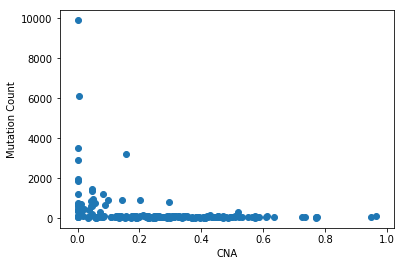

In [24]:
fig, ax = plt.subplots()
ax.scatter(colorectal['CNA'], colorectal['Mutation Count'])
plt.xlabel('CNA')
plt.ylabel('Mutation Count')
plt.show()

In [35]:
df_ces = pd.read_table('data/ces_data.txt')
ces = []
for p in df_ces.columns[2:]:
    ces.append([p,df_ces[p].sum()])

ces = pd.DataFrame(ces)
ces.columns = ['id','ces']
print(len(ces))
ces.head()

383


,id,ces
0,TCGA-D5-6531-01,1.8834
1,TCGA-DM-A28A-01,6.4499
2,TCGA-DC-5869-01,7.8741
3,TCGA-F4-6460-01,-4.8967
4,TCGA-DY-A1DC-01,1.8764


In [36]:
df = colorectal.merge(ces,how='inner',left_on='SAMPLE ID', right_on='id')
print(len(df))

381


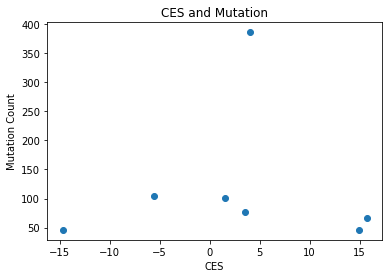

In [38]:
fig, ax = plt.subplots()
ax.scatter(df['ces'], df['Mutation Count'])
plt.xlabel('CES')
plt.ylabel('Mutation Count')
plt.title('CES and Mutation')
plt.show()

In [44]:
lung = pd.read_csv('data/Lung Adenocarcinoma (TCGA, Provisional).csv')
lung_ces = pd.read_table('data/lung_ces_expr.txt')

In [47]:
ces = []
for p in lung_ces.columns[2:]:
    ces.append([p,lung_ces[p].sum()])

ces = pd.DataFrame(ces)
ces.columns = ['id','ces']
print(len(ces))
ces.head()

518


,id,ces
0,TCGA-62-A46S-01,-11.1319
1,TCGA-67-3770-01,-7.4949
2,TCGA-64-1681-01,-7.7362
3,TCGA-MP-A4TF-01,0.1610
4,TCGA-86-A4D0-01,27.8214


In [48]:
df_lung = lung.merge(ces,how='inner',left_on='SAMPLE ID', right_on='id')
print(len(df_lung))

517


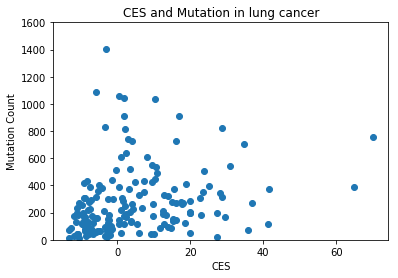

In [53]:
fig, ax = plt.subplots()
ax.scatter(df_lung['ces'], df_lung['Mutation Count'])
plt.xlabel('CES')
plt.ylabel('Mutation Count')
plt.ylim(0,1600)
plt.title('CES and Mutation in lung cancer')
plt.show()